In [1]:
import pandas as pd 
import numpy as np
import sklearn.manifold._t_sne as tsne
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 100

In [3]:
train = pd.read_csv('./data/Train.csv')
test = pd.read_csv('./data/Test.csv')
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [4]:
train.sort_values(['date','city'],inplace=True)

In [5]:
train['city'].unique()

array(['Kampala', 'Nairobi', 'Lagos', 'Bujumbura'], dtype=object)

In [6]:
train['date_day'] = train['date'].dt.day_of_year
train['date_month'] = train['date'].dt.month

In [7]:
x = train[['date_day','pm2_5']].groupby('date_day').aggregate('mean')

<Axes: xlabel='date_day', ylabel='cloud_sensor_azimuth_angle'>

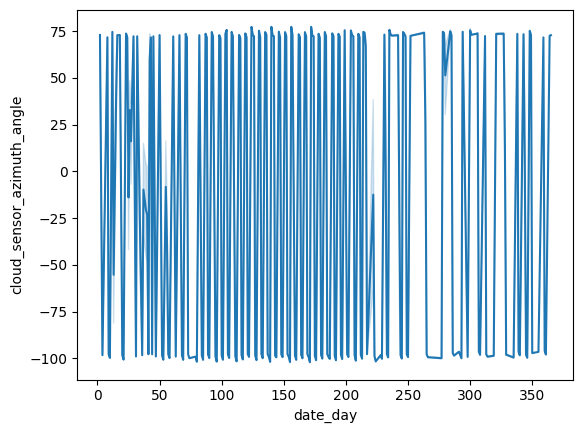

In [8]:
sns.lineplot(y=train['cloud_sensor_azimuth_angle'],x=train['date_day'])

In [9]:
train[train['city']=='Kampala']['pm2_5']

596     13.73180
878     15.46720
1711    15.66390
2115    23.62720
2244    16.13590
          ...   
6088    32.07730
6351    20.23585
6549    24.82630
6858    24.15020
7074    37.60350
Name: pm2_5, Length: 5596, dtype: float64

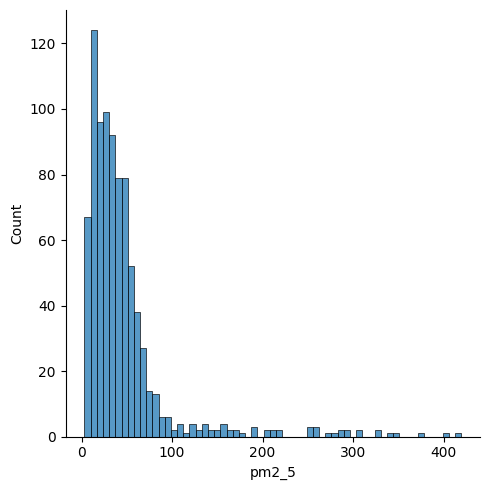

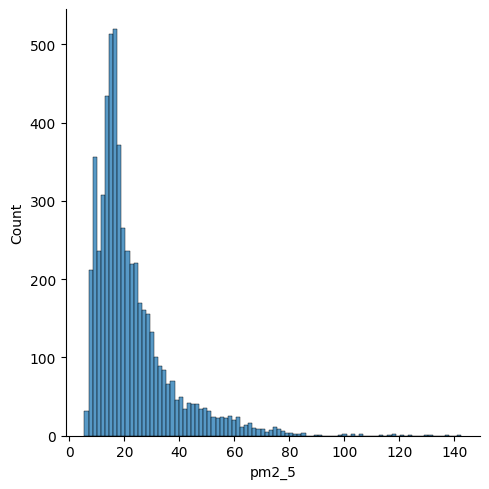

In [10]:
sns.displot(train[train['city']=='Lagos']['pm2_5'])
sns.displot(train[train['city']=='Kampala']['pm2_5'])
# sns.displot(train[train['city']=='Lagos']['pm2_5'])
# sns.displot(train[train['city']=='Lagos']['pm2_5'])

<Axes: xlabel='date_day', ylabel='pm2_5'>

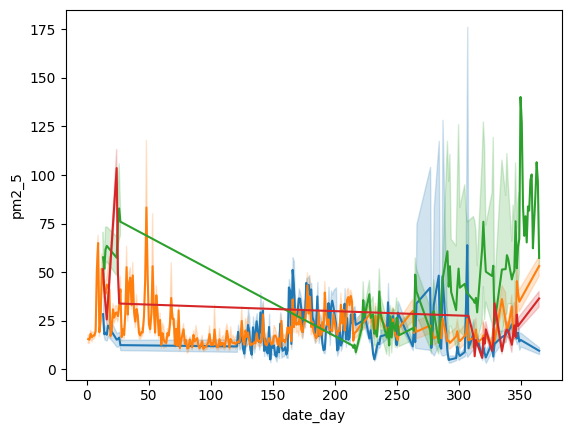

In [11]:
sns.lineplot(y=train[train['city']=='Nairobi']['pm2_5'],x=train[train['city']=='Nairobi']['date_day'])
sns.lineplot(y=train[train['city']=='Kampala']['pm2_5'],x=train[train['city']=='Kampala']['date_day'])
sns.lineplot(y=train[train['city']=='Lagos']['pm2_5'],x=train[train['city']=='Lagos']['date_day'])
sns.lineplot(y=train[train['city']=='Bujumbura']['pm2_5'],x=train[train['city']=='Bujumbura']['date_day'])

<Axes: xlabel='pm2_5', ylabel='date_month'>

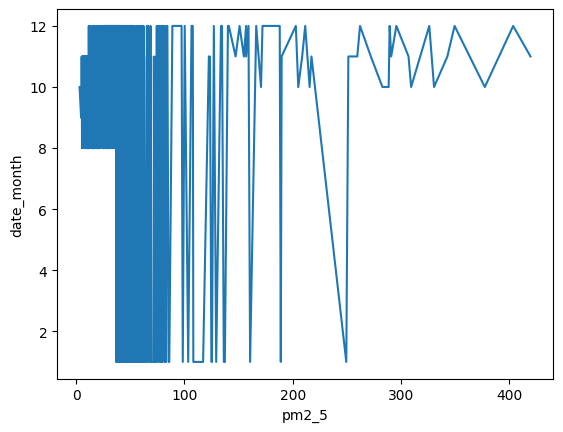

In [12]:
sns.lineplot(x=train[train['city']=='Lagos']['pm2_5'],y=train[train['city']=='Lagos']['date_month'])


<Axes: xlabel='date', ylabel='pm2_5'>

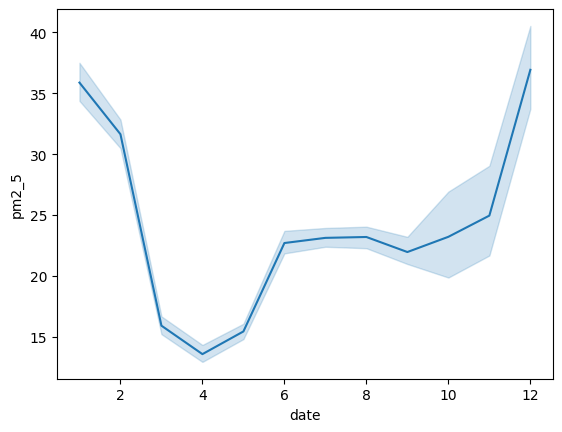

In [13]:
sns.lineplot(x=train['date'].dt.month,y=train['pm2_5'])

In [14]:
train['pm2_5'].describe()

count    8071.000000
mean       24.639296
std        24.878920
min         1.200000
25%        13.270600
50%        18.375400
75%        28.838400
max       456.193333
Name: pm2_5, dtype: float64

<Axes: xlabel='hour', ylabel='pm2_5'>

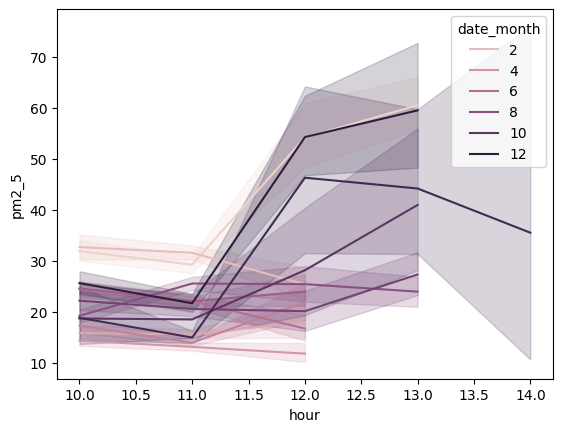

In [15]:
sns.lineplot(x=train['hour'],y=train['pm2_5'],hue=train['date_month'])


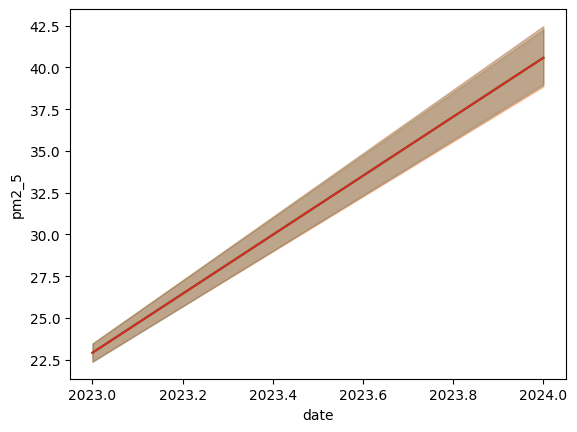

In [16]:
for city in train['city'].unique():
    sns.lineplot(x=train['date'].dt.year,y=train['pm2_5'])


<Axes: xlabel='site_latitude', ylabel='site_longitude'>

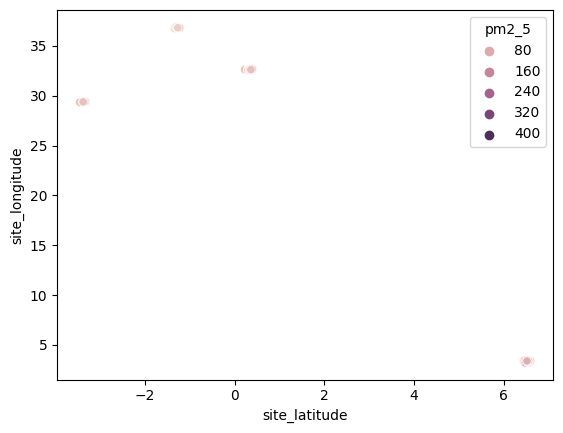

In [17]:
sns.scatterplot(x=train['site_latitude'],y=train['site_longitude'],hue=train['pm2_5'])

In [18]:
train

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,date_day,date_month
596,id_p56so4vy1v,616fe4ce9657420029658b3e,0.405320,32.620270,Kampala,Uganda,2023-01-01,11,-0.000274,0.603559,-0.000165,0.000000,75.540374,22.573399,-142.778838,29.921294,-0.000080,1.0,0.031688,1357.751736,1527.715382,829661.486317,72.569760,22.743221,-142.741380,29.894246,0.000058,0.000027,0.000032,0.000100,8613.751538,-0.499405,0.000922,829675.625000,75.540374,22.573399,-142.778838,29.921294,0.000102,0.967658,0.000041,0.000000,29.921294,-142.778838,22.573399,75.540374,-0.499410,829675.625000,75.540374,22.573399,-142.778838,29.921294,0.120352,2.258702,0.275707,230.254514,0.000000,75.540374,22.573399,-142.778838,29.921294,1162.714722,88394.562500,1.578868,22.704029,75.529068,-142.796692,29.907488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.73180,1,1
878,id_m4csufeniu,6353b53377ee57002903db54,0.306112,32.565726,Kampala,Uganda,2023-01-01,11,0.000255,0.614896,0.000157,0.085492,75.500801,23.098633,-142.725784,29.796234,0.000075,1.0,0.039754,1483.224121,2308.938721,829669.125000,72.588524,23.317125,-142.744370,29.791368,0.000066,0.000034,0.000032,0.000111,8613.731261,-0.476858,0.058912,829688.750000,75.500801,23.098633,-142.725784,29.796234,0.000142,0.989206,0.000083,0.085492,29.796234,-142.725784,23.098633,75.500801,-0.476859,829688.750000,75.500801,23.098633,-142.725784,29.796234,0.119855,2.264576,0.275650,230.276535,0.086199,75.500801,23.098633,-142.725784,29.796234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [19]:
import seaborn
import matplotlib.pyplot as plt

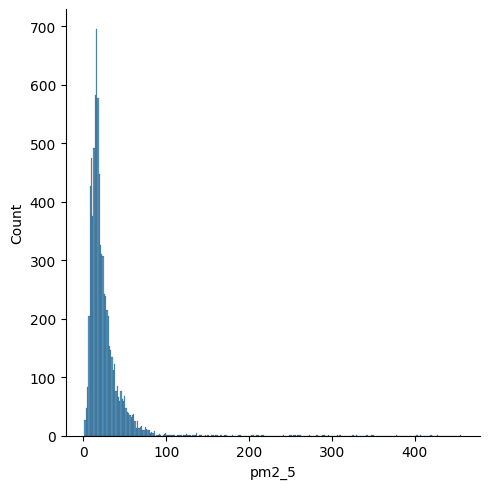

In [20]:
seaborn.displot(train['pm2_5'])

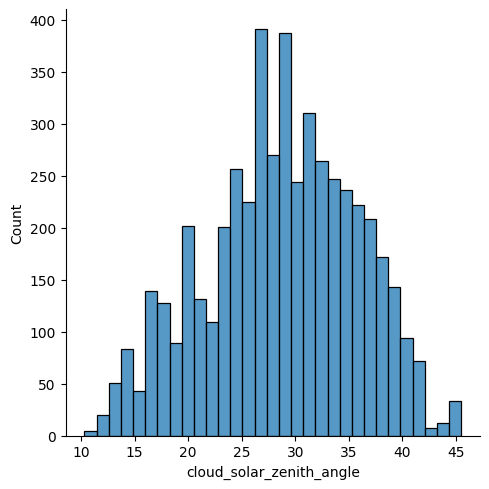

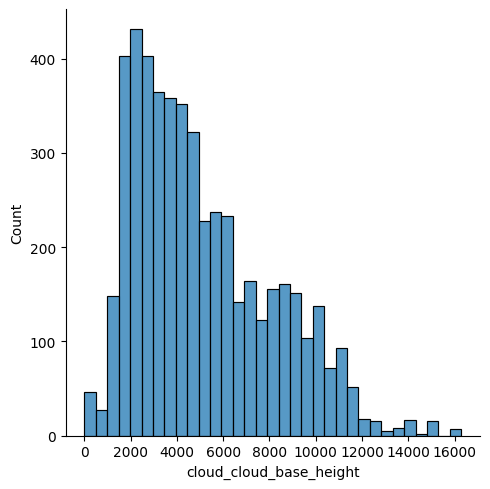

In [21]:
seaborn.displot(train['cloud_solar_zenith_angle'])
plt.show()
seaborn.displot(train['cloud_cloud_base_height'])

In [22]:
train.select_dtypes(include='number').corr()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,date_day,date_month
site_latitude,1.000000,-0.962193,0.704178,0.006901,-0.153664,-0.016063,0.003099,-0.035957,0.063662,-0.424198,0.310714,-0.039264,0.172595,0.724459,0.375785,-0.086167,-0.661450,-0.009090,0.042756,-0.360643,0.159235,0.670557,0.665561,-0.053488,0.685033,-0.199461,0.560575,0.052577,-0.685357,-0.006658,0.075713,-0.424434,0.296134,0.233814,-0.046268,0.259097,-0.035425,0.247938,-0.391869,0.041320,-0.020379,0.323169,-0.628718,-0.002037,0.008997,-0.296739,0.094935,0.077089,0.026674,0.042270,0.076724,-0.111607,-0.000947,0.009799,-0.299735,0.093968,-0.169142,0.184340,-0.158891,-0.084891,0.002630,-0.245979,0.013799,-0.109215,0.026391,-0.012649,0.024992,-0.012458,-0.016321,-0.300106,-0.012043,0.118214,-0.245422,0.042825,0.288082,0.176688,0.172595
site_longitude,-0.962193,1.000000,-0.737978,-0.009135,0.149126,0.013567,-0.013043,0.026282,-0.079726,0.448750,-0.324148,0.036946,-0.229735,-0.730661,-0.349625,0.099054,0.639064,-0.004334,-0.064791,0.393051,-0.176597,-0.689422,-0.685653,0.092666,-0.715982,0.212884,-0.574607,-0.078920,0.659171,-0.002112,-0.098122,0.453888,-0.310961,-0.226874,0.022775,-0.256605,0.022866,-0.267242,0.421995,-0.058246,0.013270,-0.342562,0.576669,0.000108,-0.012309,0.333010,-0.127992,-0.026300,-0.043221,-0.046183,-0.108026,0.105004,-0.001929,-0.013752,0.337048,-0.125138,0.175495,-0.190113,0.187213,0.090679,0.023011,0.263802,-0.050328,0.113115,-0.076946,0.060338,-0.075676,0.060236,0.023976,0.365192,-0.000089,-0.105542,0.279245,-0.073977,-0.305682,-0.234717

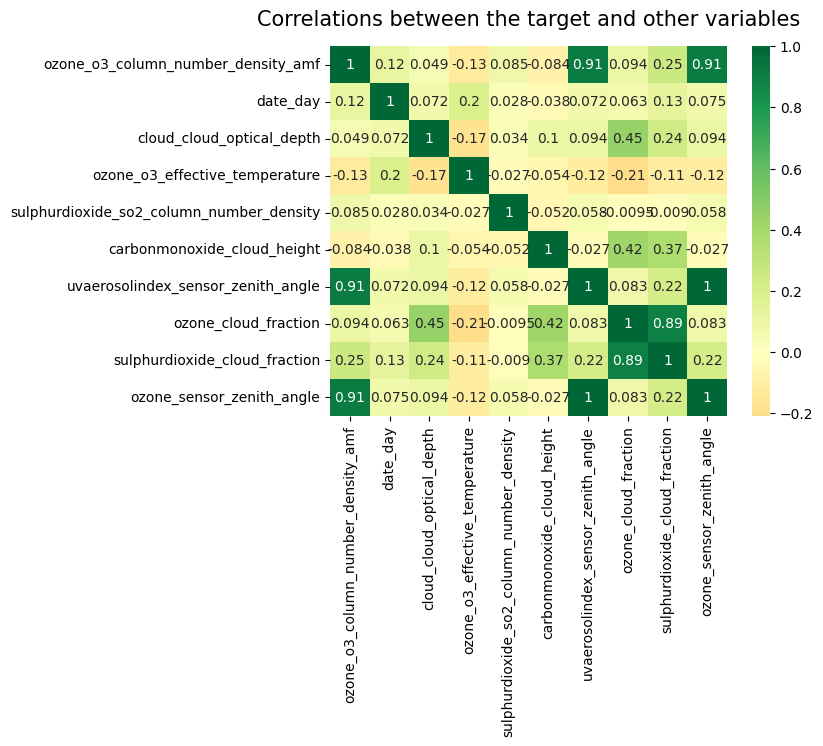

In [23]:
# Select only numerical features
train_num_df = train.select_dtypes(include=['number'])

top10_corrs = abs(train_num_df.corr()['pm2_5']).sort_values(ascending = False).tail(10)
# top10_corrs += top10_corrs + train['pm2_5']
corr = train_num_df[list(top10_corrs.index)].corr()
seaborn.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlations between the target and other variables', pad = 15, fontdict={'size': 15})
plt.show()

<Axes: >

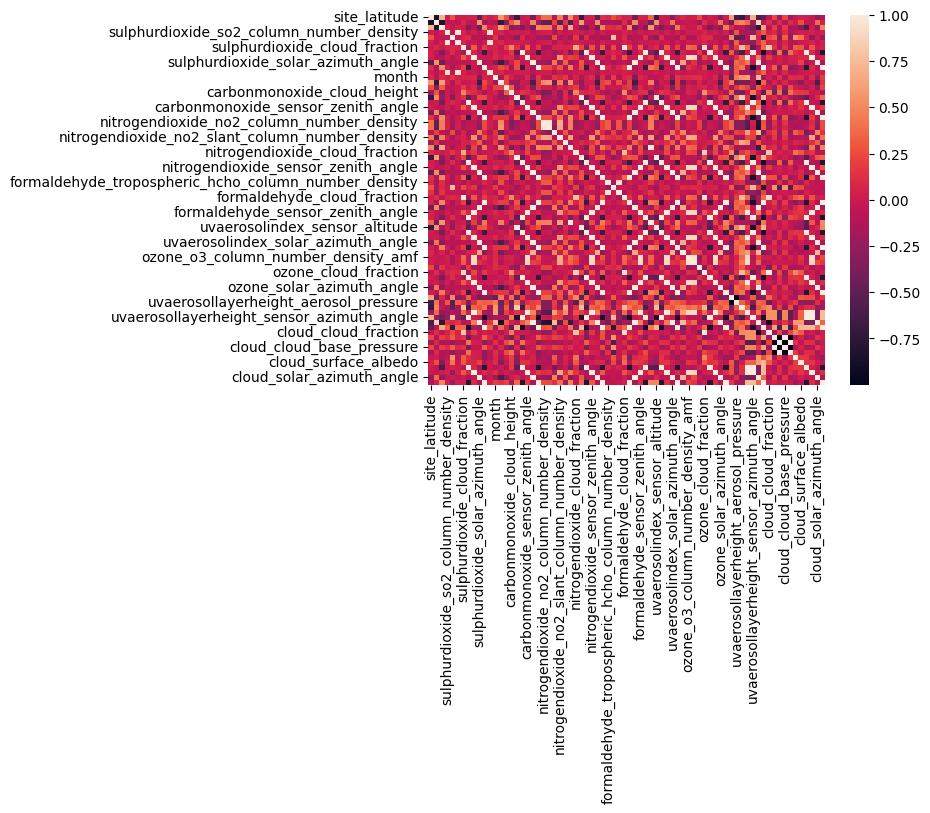

In [24]:
seaborn.heatmap(test.select_dtypes(include='number').corr(),linewidths=0.0028105)


In [25]:
train

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,date_day,date_month
596,id_p56so4vy1v,616fe4ce9657420029658b3e,0.405320,32.620270,Kampala,Uganda,2023-01-01,11,-0.000274,0.603559,-0.000165,0.000000,75.540374,22.573399,-142.778838,29.921294,-0.000080,1.0,0.031688,1357.751736,1527.715382,829661.486317,72.569760,22.743221,-142.741380,29.894246,0.000058,0.000027,0.000032,0.000100,8613.751538,-0.499405,0.000922,829675.625000,75.540374,22.573399,-142.778838,29.921294,0.000102,0.967658,0.000041,0.000000,29.921294,-142.778838,22.573399,75.540374,-0.499410,829675.625000,75.540374,22.573399,-142.778838,29.921294,0.120352,2.258702,0.275707,230.254514,0.000000,75.540374,22.573399,-142.778838,29.921294,1162.714722,88394.562500,1.578868,22.704029,75.529068,-142.796692,29.907488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.73180,1,1
878,id_m4csufeniu,6353b53377ee57002903db54,0.306112,32.565726,Kampala,Uganda,2023-01-01,11,0.000255,0.614896,0.000157,0.085492,75.500801,23.098633,-142.725784,29.796234,0.000075,1.0,0.039754,1483.224121,2308.938721,829669.125000,72.588524,23.317125,-142.744370,29.791368,0.000066,0.000034,0.000032,0.000111,8613.731261,-0.476858,0.058912,829688.750000,75.500801,23.098633,-142.725784,29.796234,0.000142,0.989206,0.000083,0.085492,29.796234,-142.725784,23.098633,75.500801,-0.476859,829688.750000,75.500801,23.098633,-142.725784,29.796234,0.119855,2.264576,0.275650,230.276535,0.086199,75.500801,23.098633,-142.725784,29.796234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

city
Bujumbura    Axes(0.125,0.11;0.775x0.77)
Kampala      Axes(0.125,0.11;0.775x0.77)
Lagos        Axes(0.125,0.11;0.775x0.77)
Nairobi      Axes(0.125,0.11;0.775x0.77)
Name: sulphurdioxide_so2_column_number_density, dtype: object

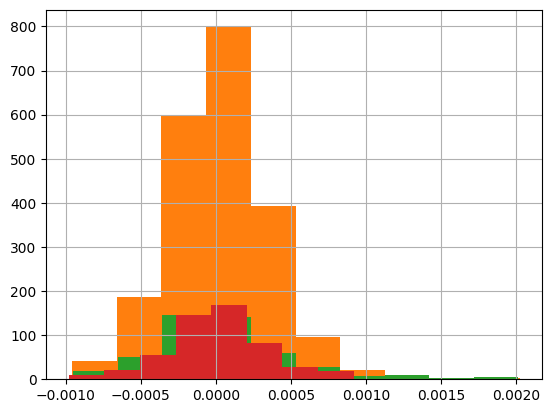

In [26]:
train.groupby('city')['sulphurdioxide_so2_column_number_density'].hist()


city
Accra      Axes(0.125,0.11;0.775x0.77)
Gulu       Axes(0.125,0.11;0.775x0.77)
Kisumu     Axes(0.125,0.11;0.775x0.77)
Yaoundé    Axes(0.125,0.11;0.775x0.77)
Name: sulphurdioxide_so2_column_number_density, dtype: object

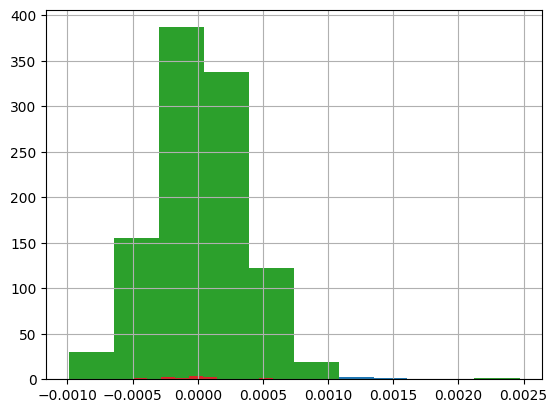

In [27]:
test.groupby('city')['sulphurdioxide_so2_column_number_density'].hist()

In [28]:
train.describe()

,site_latitude,site_longitude,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,date_day,date_month
count,8071.000000,8071.000000,8071,8071.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,8071.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,8066.000000,8066.000000,8066.000000,8066.000000,8066.000000,8066.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,8071.000000,8071.000000,8071.000000
mean,0.635678,30.246982,2023-07-24 12:30:14.496345088,10.877463,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,27.700157,0.000004,6.122414,0.034887,2200.218221,2041.463881,829573.191993,-8.063021,38.482742,-91.507702,28.609344,0.000074,0.000040,0.000033,0.000130,8836.367723,-0.369219,0.081754,829581.679425,-12.334603,37.299477,-93.711870,28.807872,0.000175,1.046935,0.000109,0.192196,28.036877,-92.363482,40.218543,-2.760999,-0.442617,829596.648655,-12.608537,41.387619,-88.902996,28.385504,0.117739,2.650292,0.316414,228.241939,0

In [29]:
test.describe()

,site_latitude,site_longitude,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
count,2783.000000,2783.000000,2783,2783.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,2783.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,1.549512,28.547601,2023-09-15 17:14:51.268415488,10.968020,0.000019,0.671654,0.000010,0.096423,-11.358700,40.219066,-86.105632,29.781836,0.000002,7.916277,0.032953,2337.029853,2001.195836,829429.258224,-12.324836,39.913386,-84.622304,29.787402,0.000053,0.000018,0.000034,0.000111,9060.614230,-0.396956,0.056197,829502.219047,-19.960597,39.752012,-86.916801,30.527450,0.000148,1.031356,0.000084,0.143701,29.851396,-86.288536,41.620450,-12.366496,-0.436858,829457.957252,-11.223326,41.865290,-87.867081,29.662178,0.117087,2.672449,0.317350,228.499727,0.330448,-11.629505,41.944202,-88.086102,29.673805,1561.505802,847

In [30]:
train

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,date_day,date_month
596,id_p56so4vy1v,616fe4ce9657420029658b3e,0.405320,32.620270,Kampala,Uganda,2023-01-01,11,-0.000274,0.603559,-0.000165,0.000000,75.540374,22.573399,-142.778838,29.921294,-0.000080,1.0,0.031688,1357.751736,1527.715382,829661.486317,72.569760,22.743221,-142.741380,29.894246,0.000058,0.000027,0.000032,0.000100,8613.751538,-0.499405,0.000922,829675.625000,75.540374,22.573399,-142.778838,29.921294,0.000102,0.967658,0.000041,0.000000,29.921294,-142.778838,22.573399,75.540374,-0.499410,829675.625000,75.540374,22.573399,-142.778838,29.921294,0.120352,2.258702,0.275707,230.254514,0.000000,75.540374,22.573399,-142.778838,29.921294,1162.714722,88394.562500,1.578868,22.704029,75.529068,-142.796692,29.907488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.73180,1,1
878,id_m4csufeniu,6353b53377ee57002903db54,0.306112,32.565726,Kampala,Uganda,2023-01-01,11,0.000255,0.614896,0.000157,0.085492,75.500801,23.098633,-142.725784,29.796234,0.000075,1.0,0.039754,1483.224121,2308.938721,829669.125000,72.588524,23.317125,-142.744370,29.791368,0.000066,0.000034,0.000032,0.000111,8613.731261,-0.476858,0.058912,829688.750000,75.500801,23.098633,-142.725784,29.796234,0.000142,0.989206,0.000083,0.085492,29.796234,-142.725784,23.098633,75.500801,-0.476859,829688.750000,75.500801,23.098633,-142.725784,29.796234,0.119855,2.264576,0.275650,230.276535,0.086199,75.500801,23.098633,-142.725784,29.796234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [31]:
train.notna().sum()[:30]

id                                                         8071
site_id                                                    8071
site_latitude                                              8071
site_longitude                                             8071
city                                                       8071
country                                                    8071
date                                                       8071
hour                                                       8071
sulphurdioxide_so2_column_number_density                   3159
sulphurdioxide_so2_column_number_density_amf               3159
sulphurdioxide_so2_slant_column_number_density             3159
sulphurdioxide_cloud_fraction                              3159
sulphurdioxide_sensor_azimuth_angle                        3159
sulphurdioxide_sensor_zenith_angle                         3159
sulphurdioxide_solar_azimuth_angle                         3159
sulphurdioxide_solar_zenith_angle       

In [32]:
train['nitrogendioxide_no2_slant_column_number_density'].nunique()

2502

In [33]:
train['site_id'].nunique()

69

In [34]:
train['sulphurdioxide_so2_column_number_density'].nunique()

2658

In [35]:
train['city'].nunique()

4

<Axes: xlabel='cloud_cloud_base_pressure', ylabel='pm2_5'>

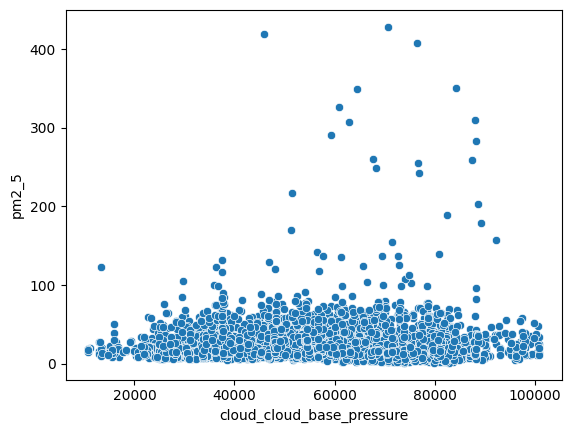

In [36]:
seaborn.scatterplot(x=train['cloud_cloud_base_pressure'],y=train['pm2_5'])

<Axes: xlabel='sulphurdioxide_so2_column_number_density', ylabel='pm2_5'>

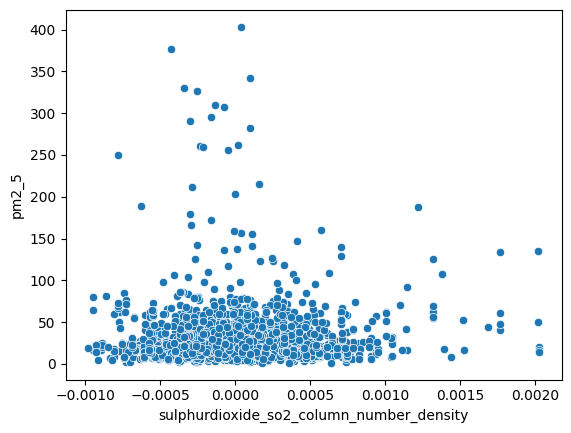

In [37]:
seaborn.scatterplot(x=train['sulphurdioxide_so2_column_number_density'],y=train['pm2_5'])

In [38]:
train[['pm2_5','nitrogendioxide_no2_slant_column_number_density']].corr()

,pm2_5,nitrogendioxide_no2_slant_column_number_density
pm2_5,1.000000,0.395134
nitrogendioxide_no2_slant_column_number_density,0.395134,1.000000


In [39]:
train

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,date_day,date_month
596,id_p56so4vy1v,616fe4ce9657420029658b3e,0.405320,32.620270,Kampala,Uganda,2023-01-01,11,-0.000274,0.603559,-0.000165,0.000000,75.540374,22.573399,-142.778838,29.921294,-0.000080,1.0,0.031688,1357.751736,1527.715382,829661.486317,72.569760,22.743221,-142.741380,29.894246,0.000058,0.000027,0.000032,0.000100,8613.751538,-0.499405,0.000922,829675.625000,75.540374,22.573399,-142.778838,29.921294,0.000102,0.967658,0.000041,0.000000,29.921294,-142.778838,22.573399,75.540374,-0.499410,829675.625000,75.540374,22.573399,-142.778838,29.921294,0.120352,2.258702,0.275707,230.254514,0.000000,75.540374,22.573399,-142.778838,29.921294,1162.714722,88394.562500,1.578868,22.704029,75.529068,-142.796692,29.907488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.73180,1,1
878,id_m4csufeniu,6353b53377ee57002903db54,0.306112,32.565726,Kampala,Uganda,2023-01-01,11,0.000255,0.614896,0.000157,0.085492,75.500801,23.098633,-142.725784,29.796234,0.000075,1.0,0.039754,1483.224121,2308.938721,829669.125000,72.588524,23.317125,-142.744370,29.791368,0.000066,0.000034,0.000032,0.000111,8613.731261,-0.476858,0.058912,829688.750000,75.500801,23.098633,-142.725784,29.796234,0.000142,0.989206,0.000083,0.085492,29.796234,-142.725784,23.098633,75.500801,-0.476859,829688.750000,75.500801,23.098633,-142.725784,29.796234,0.119855,2.264576,0.275650,230.276535,0.086199,75.500801,23.098633,-142.725784,29.796234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [40]:
train.describe()

,site_latitude,site_longitude,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,date_day,date_month
count,8071.000000,8071.000000,8071,8071.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,8071.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,8066.000000,8066.000000,8066.000000,8066.000000,8066.000000,8066.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,8071.000000,8071.000000,8071.000000
mean,0.635678,30.246982,2023-07-24 12:30:14.496345088,10.877463,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,27.700157,0.000004,6.122414,0.034887,2200.218221,2041.463881,829573.191993,-8.063021,38.482742,-91.507702,28.609344,0.000074,0.000040,0.000033,0.000130,8836.367723,-0.369219,0.081754,829581.679425,-12.334603,37.299477,-93.711870,28.807872,0.000175,1.046935,0.000109,0.192196,28.036877,-92.363482,40.218543,-2.760999,-0.442617,829596.648655,-12.608537,41.387619,-88.902996,28.385504,0.117739,2.650292,0.316414,228.241939,0

In [41]:
test.describe()

,site_latitude,site_longitude,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
count,2783.000000,2783.000000,2783,2783.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,2783.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,1.549512,28.547601,2023-09-15 17:14:51.268415488,10.968020,0.000019,0.671654,0.000010,0.096423,-11.358700,40.219066,-86.105632,29.781836,0.000002,7.916277,0.032953,2337.029853,2001.195836,829429.258224,-12.324836,39.913386,-84.622304,29.787402,0.000053,0.000018,0.000034,0.000111,9060.614230,-0.396956,0.056197,829502.219047,-19.960597,39.752012,-86.916801,30.527450,0.000148,1.031356,0.000084,0.143701,29.851396,-86.288536,41.620450,-12.366496,-0.436858,829457.957252,-11.223326,41.865290,-87.867081,29.662178,0.117087,2.672449,0.317350,228.499727,0.330448,-11.629505,41.944202,-88.086102,29.673805,1561.505802,847

In [42]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7f61cc5fbe50>,
 [Text(-0.1910130855889933, 1.083288512416601, ''),
  Text(-0.37622194259509467, -1.0336619611410558, ''),
  Text(0.9526280900645454, -0.5499997472908298, '')])

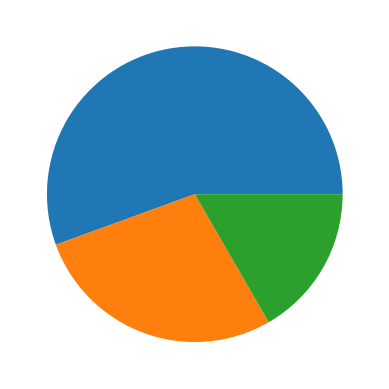

In [43]:
plt.pie([20,10,6])

<Axes: >

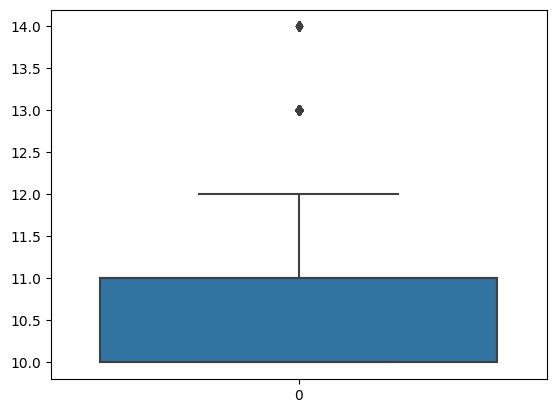

In [44]:
seaborn.boxplot(train['hour'])